In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set_context('talk')
np.set_printoptions(suppress=True) 
    ### not xEyy format(science float format)
%matplotlib inline    

In [2]:
import scipy.io
data = scipy.io.loadmat('ex5data1.mat')
print data.keys()

['ytest', 'yval', '__header__', '__globals__', 'Xtest', 'Xval', 'y', 'X', '__version__']


In [3]:
X = data['X']
y = data['y']
Xval = data['Xval']
yval = data['yval']
Xtest = data['Xtest']
ytest = data['ytest']

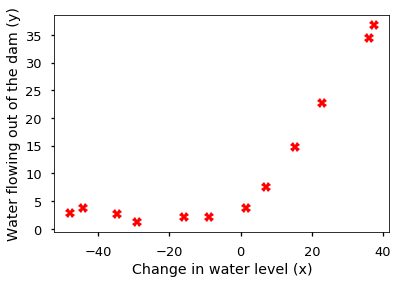

In [4]:
plt.plot(X, y, 'rX');
plt.xlabel('Change in water level (x)');
plt.ylabel('Water flowing out of the dam (y)');

In [54]:
def regGrad(theta, *args):
    (X, y, lamb) = args
    m = len(y)
    
    theta_00 = theta.copy()
    theta_00[0] = 0
    g1 = 1./m * np.sum((np.dot(X,theta)-y)*X, axis=0).reshape(-1,1)
    g2 = lamb/m * theta_00
    grad = g1 + g2
#     grad = grad.flatten()
    return grad

def regCostJ(theta, *args):
    (X, y, lamb) = args
    m = len(y)
    
    theta_but0 = theta[1:]
    J1 = 1./(2.*m)*np.sum((np.dot(X,theta)-y)**2)
    J2 = lamb/(2.*m)*np.sum(theta_but0**2)
    J = J1+J2
    return J

def linearRegCostFunction(X, y, theta, lamb):
    J = regCostJ(theta, X, y, lamb)
    grad = regGrad(theta, X, y, lamb)
    return J, grad

In [55]:
m = len(X)
theta = np.array([1, 1]).reshape(-1,1)
XX = np.append(np.ones([m, 1]), X, axis=1)
J, grad = linearRegCostFunction(XX, y, theta, 1.0)
print J    ### 303.993192
print grad ### -15.303016; 598.250744

303.9931922202643
[[-15.30301567]
 [598.25074417]]
